# **Hand Written Digit Prediction-Plassification Analysis**

The digits dataset consists of 8x8 pixel images of the digits. the images attribute of the dataset stores 8x8 arrays of grayscale values for each image.we will use these arrays to visualize the first 4 images . the target attribute of the dataset stores the digit each iamge represents

# **Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# **Import Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df=load_digits()

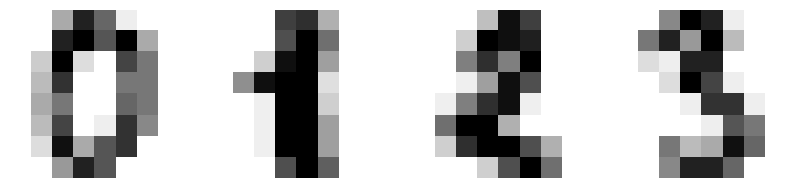

In [7]:
  _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
  for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

# **Data Preprocessing**

Flatten Image

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [12]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [13]:
data[0].shape

(64,)

In [14]:
data.shape

(1797, 64)

# **Scaling Data**

In [15]:
data.min()

0.0

In [16]:
data.max()

16.0

In [17]:
data = data/16

In [18]:
data.min()

0.0

In [19]:
data.max()

1.0

In [20]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train test split Data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(data, df.target, test_size = 0.3)

In [23]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Modeling**

Random Forest model

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier()

Train or Fit Mode

In [27]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

# **Prediction**

Predict Test Data

In [28]:
y_pred = rf.predict(xtest)

In [29]:
y_pred

array([3, 8, 1, 4, 8, 7, 1, 4, 7, 3, 9, 6, 4, 4, 4, 6, 5, 9, 8, 9, 8, 2,
       7, 0, 8, 7, 7, 7, 1, 9, 8, 5, 5, 7, 9, 2, 7, 8, 1, 0, 4, 9, 7, 2,
       7, 7, 7, 5, 3, 8, 7, 1, 2, 2, 3, 8, 1, 1, 7, 0, 4, 8, 8, 4, 4, 1,
       5, 4, 3, 6, 6, 1, 0, 9, 0, 8, 5, 5, 0, 3, 0, 5, 5, 2, 8, 8, 6, 3,
       2, 5, 4, 8, 4, 1, 4, 7, 9, 3, 5, 6, 9, 1, 7, 7, 1, 7, 0, 9, 2, 2,
       7, 6, 9, 8, 9, 2, 0, 0, 8, 6, 2, 6, 6, 4, 4, 3, 3, 0, 5, 0, 4, 4,
       0, 3, 9, 8, 8, 0, 2, 5, 3, 3, 9, 0, 7, 7, 2, 1, 3, 7, 7, 0, 2, 3,
       7, 6, 9, 2, 0, 8, 2, 1, 1, 3, 7, 8, 1, 9, 7, 4, 0, 1, 6, 8, 5, 6,
       9, 4, 4, 9, 8, 2, 5, 8, 2, 4, 7, 4, 7, 8, 8, 3, 5, 2, 2, 1, 8, 6,
       6, 1, 4, 9, 3, 8, 3, 1, 5, 6, 8, 7, 6, 3, 9, 2, 5, 2, 6, 4, 9, 5,
       7, 6, 2, 3, 1, 3, 4, 5, 7, 4, 3, 3, 5, 1, 2, 4, 9, 2, 4, 4, 3, 5,
       5, 4, 0, 7, 8, 7, 6, 2, 2, 9, 9, 0, 6, 3, 5, 7, 4, 5, 2, 3, 1, 7,
       1, 0, 4, 7, 2, 5, 3, 9, 1, 1, 5, 6, 8, 8, 9, 0, 2, 5, 3, 9, 4, 9,
       6, 6, 4, 1, 6, 1, 8, 3, 3, 0, 3, 9, 2, 9, 3,

# **Model Evaluation**

Model Accuracy


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
confusion_matrix(ytest, y_pred)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 52]])

In [32]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       0.92      1.00      0.96        59
           2       1.00      0.97      0.98        59
           3       0.96      0.98      0.97        48
           4       1.00      1.00      1.00        57
           5       0.98      1.00      0.99        53
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        51
           8       1.00      0.95      0.97        57
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# **Explaination**

Handwritten Digit Prediction, or Digit Classification, is like training a computer to read and understand handwritten numbers, similar to how we recognize them ourselves. Imagine you have a bunch of pictures, each showing a handwritten digit from 0 to 9. The goal is to teach the computer how to look at these pictures and figure out which digit is in each one. We split our pictures into two groups: one set to teach the computer (training set) and another to test its skills (testing set). We choose a smart method, like a special problem-solving recipe, for the computer to learn the patterns and differences in the pictures. As it learns, we guide it by telling whether its guesses are right or wrong. Once it masters this skill, we give it new pictures it hasn't seen during training, and it tries its best to guess the correct digit. We check its guesses to see how well it's doing, using simple checks to see if it's getting the numbers correct. This project helps us build a computer that can recognize handwritten digits, which has practical uses like reading postal codes or helping computers understand our handwriting. It's like teaching the computer to read your handwriting.
